# Analisando dados do Friends usando Pandas AI

## Instalando dependências

In [11]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 9.7 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 4.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Importanto bibliotecas

In [13]:
import os
import pandas as pd
from pandasai import Agent
import json



## Lendo conjunto de dados do Friends

In [8]:
df_info = pd.read_csv('data/friends_info.csv')

In [9]:
df_info.columns

Index(['Unnamed: 0', 'season', 'episode', 'title', 'directed_by', 'written_by',
       'air_date', 'us_views_millions', 'imdb_rating'],
      dtype='object')

In [30]:
df_info.shape

(236, 9)

## Configurando o Pandas AI

In [14]:
def load_config(file_path="config.json"):
    """
    Lê o arquivo config.json e retorna o conteúdo como um dicionário.
    """
    try:
        # Verifica se o arquivo existe
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"O arquivo '{file_path}' não foi encontrado.")

        # Abre e carrega o conteúdo do arquivo JSON
        with open(file_path, 'r') as file:
            config = json.load(file)
        
        return config

    except json.JSONDecodeError as e:
        raise ValueError(f"Erro ao decodificar o arquivo JSON: {e}")
    except Exception as e:
        raise RuntimeError(f"Erro ao carregar a configuração: {e}")

In [15]:
config = load_config()
api_key = config.get("PANDASAI_API_KEY")

In [16]:
os.environ["PANDASAI_API_KEY"] = api_key


## Explorando as informações dos episódios de Friends usando Pandas AI

In [18]:
agent = Agent(df_info)
agent.chat('Wich episode have the higher IMDB score?')


"The episode with the highest IMDB rating is 'The One Where Everybody Finds Out' with a rating of 9.7."

In [19]:
df_info['imdb_rating'].max()

9.7

In [20]:
df_info[df_info['imdb_rating'].max()==df_info['imdb_rating']]

,Unnamed: 0,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
110,111,5,14,The One Where Everybody Finds Out,Michael Lembeck,Alexa Junge,1999-02-11,27.70,9.7
234,235,10,17,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,52.46,9.7
235,236,10,18,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,52.46,9.7


In [21]:
agent.chat('Wich episodes has the higher IMDB score?')


,Unnamed: 0,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
110,111,5,14,The One Where Everybody Finds Out,Michael Lembeck,Alexa Junge,1999-02-11,27.70,9.7
234,235,10,17,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,52.46,9.7
235,236,10,18,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,52.46,9.7


In [22]:
agent.chat('Quais episódios tiveram melhor avaliação IMDB?')


,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
2,7,2,The One Where Rachel's Sister Babysits,Thomas Schlamme,Gregory S. MalinsMarta Kauffman & David Crane,2002-05-02,25.53,9.5


Traceback (most recent call last):
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^

"Unfortunately, I was not able to answer your question, because of the following error:\n\nPotential security risk: 'US Views (millions)' is not allowed\n"

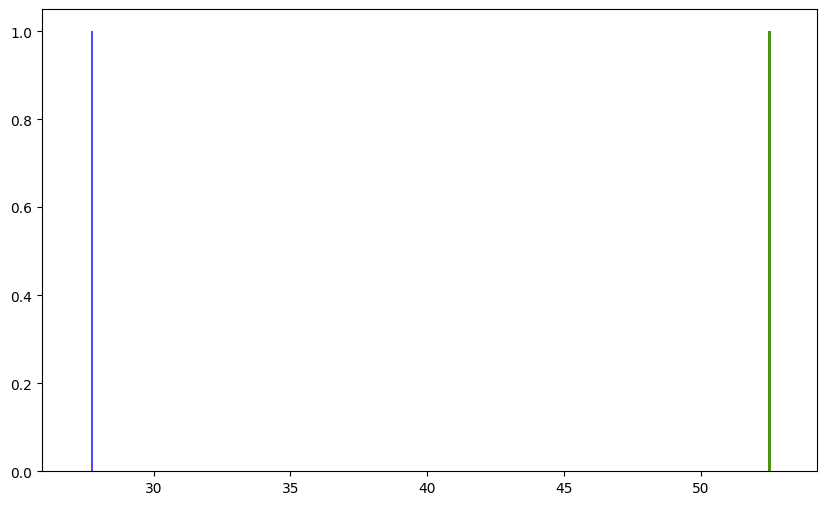

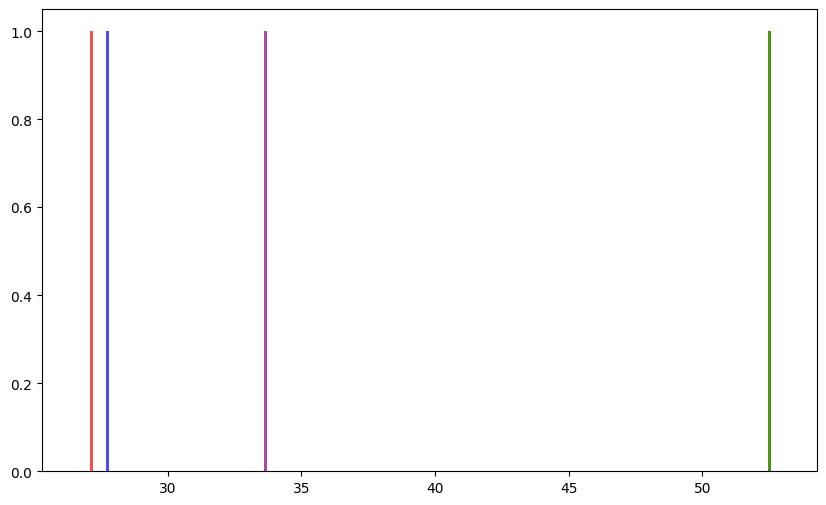

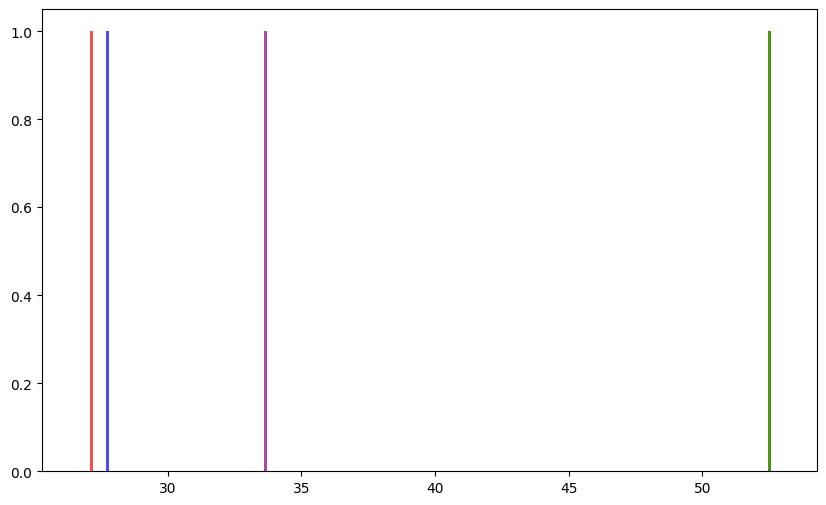

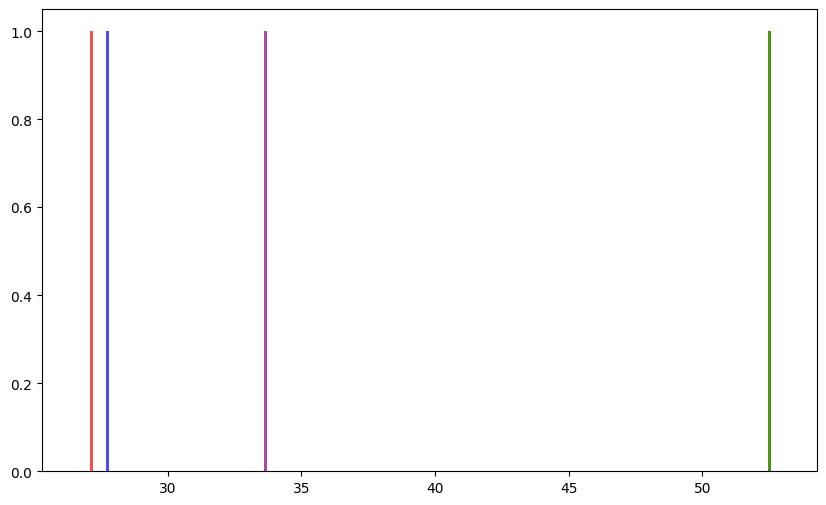

In [29]:
agent.chat('Plot the histogram of us_views_millions')


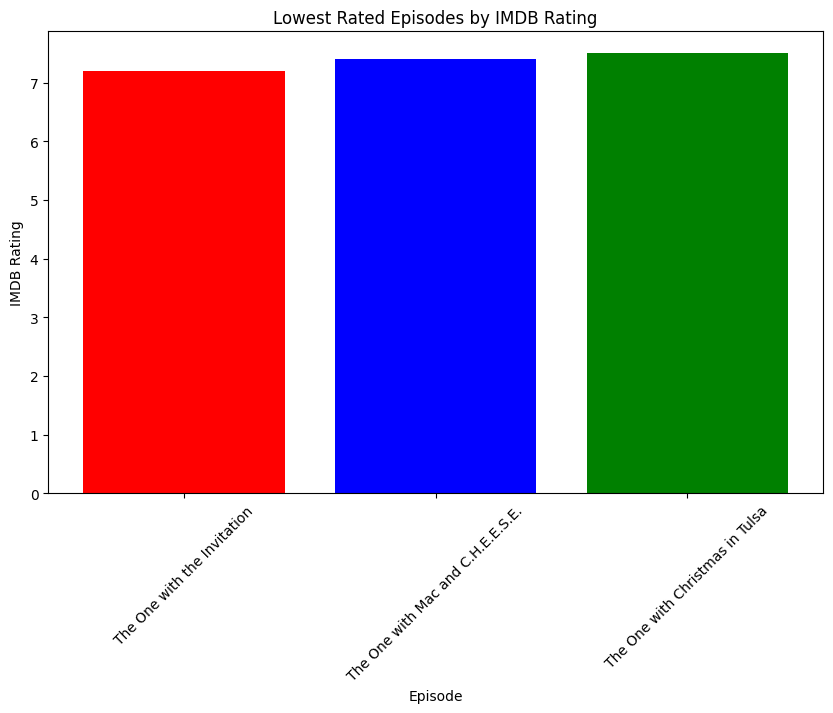

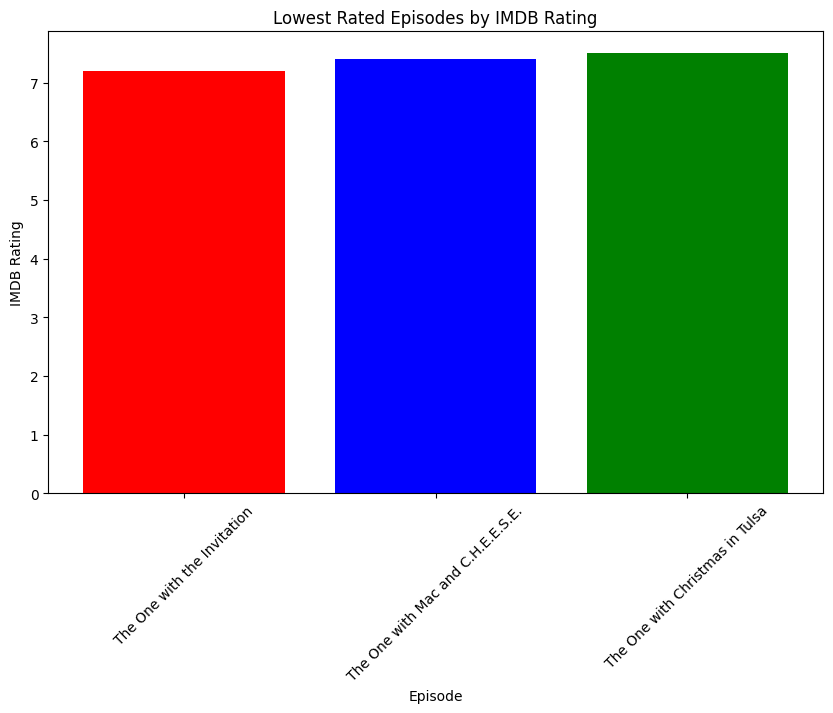

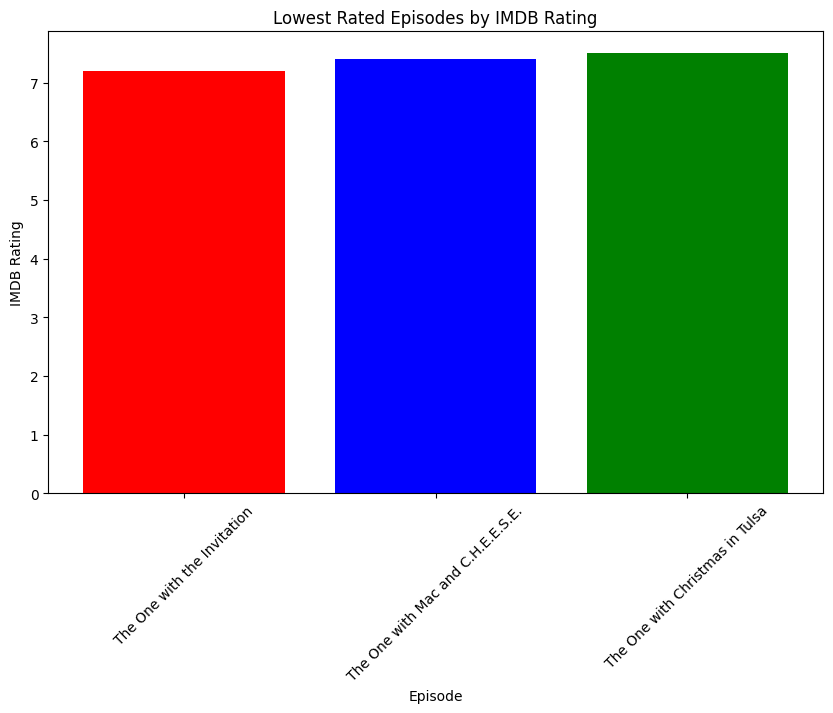

Traceback (most recent call last):
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/Users/lauradamaceno/Documents/Pandas AI/env_pandas_ai/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [31]:
agent.chat('Wich episodes has the lowest IMDB score?')


In [35]:
agent.chat('Wich episodes has the lowest IMDB score? return in dataframe')


,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,5,14,The One with Two Parts: Part 1,Ben Weiss,Story by : Robert CarlockTeleplay by : Brian B...,1999-02-25,19.03,8.0


In [33]:
df_info[df_info['imdb_rating'].min()==df_info['imdb_rating']]

,Unnamed: 0,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
93,94,4,21,The One with the Invitation,Peter Bonerz,Seth Kurland,1998-04-23,21.5,7.2


In [34]:
agent.chat('Wich episodes has the lowest IMDB score?')


,season,episode,title,imdb_rating
93,4,21,The One with the Invitation,7.2
140,6,20,The One with Mac and C.H.E.E.S.E.,7.4
166,7,21,The One with the Vows,7.5


In [46]:
agent.chat('Wich 5 directors has the higher us_views_millions? And showed me the mean us_views_millions and count the quantity of episodes by these directors')


,mean,count
directed_by,,
Mary Kay Place,32.900000,1
Thomas Schlamme,31.900000,2
Michael Lembeck,29.151250,24
Ellen Gittelsohn,28.300000,1
Robby Benson,27.933333,6


In [49]:
agent.chat('Wich episodes were directed by Mary Kay Place?')


,season,episode,title
31,2,8,The One with the List


In [51]:
agent.chat('Wich episode was directed by Mary Kay Place?')


,Unnamed: 0,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
31,32,2,8,The One with the List,Mary Kay Place,David Crane & Marta Kauffman,1995-11-16,32.9,8.5


In [52]:
agent.chat('Wich episodes has the most us_views_millions ?')


,Unnamed: 0,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
35,36,2,12,The One After the Superbowl,Michael Lembeck,Jeffrey Astrof & Mike SikowitzMichael Borkow,1996-01-28,52.9,8.6
36,37,2,13,The One After the Superbowl,Michael Lembeck,Jeffrey Astrof & Mike SikowitzMichael Borkow,1996-01-28,52.9,8.8


In [54]:
agent.chat('What season has the highter imdb_rating?')


'The season with the highest average IMDb rating is Season 10.'

In [55]:
agent.chat('What season has the highter us_views_millions?')


'The season with the highest us_views_millions is Season 2.'

In [60]:
df_info.groupby('season')['imdb_rating'].mean().sort_values(ascending=False)

season
10    8.688889
5     8.637500
6     8.496000
4     8.475000
2     8.458333
8     8.450000
7     8.437500
3     8.408000
1     8.316667
9     8.304167
Name: imdb_rating, dtype: float64

In [61]:
df_info.groupby('season')['us_views_millions'].mean().sort_values(ascending=False)

season
2     31.720833
8     26.720417
3     26.308000
10    26.129444
4     24.950000
1     24.791667
5     24.745833
9     23.930417
6     22.616000
7     22.051250
Name: us_views_millions, dtype: float64

## Avaliando a base de dados dos personagens usando Pandas AI

In [62]:
df_character = pd.read_csv('data/friends.csv')

In [63]:
df_character.columns

Index(['Unnamed: 0', 'text', 'speaker', 'season', 'episode', 'scene',
       'utterance'],
      dtype='object')

In [65]:
agent = Agent(df_character)


In [66]:
agent.chat('What speaker has the most text?')


'The speaker with the most text is: Rachel Green'

In [67]:
agent.chat('Wich speakers we have in dataset')


'Speakers in the dataset: Monica Geller, Joey Tribbiani, Chandler Bing, Phoebe Buffay, Scene Directions, #ALL#, Ross Geller, Rachel Green, Waitress, Paul the Wine Guy, Priest On Tv, Franny, Customer, Marsha, Carol Willick, Judy Geller, Susan Bunch, Barry Farber, Robbie, Bernice, Dr. Oberman, Paula, Alan, The Guys, Lizzy, Guys, Leslie, Kiki, Joanne, Receptionist, Pizza Guy, Both, Kid, Angela Delveccio, Janice Litman Goralnik, Woman, Bob, Aurora, Director, Jill Goodacre, Mr. Heckles, Paolo, Shelley, Aunt Lillian, Nurse Sizemore, Andrea, Lowell, Terry, Guy, Girl, Max, David, Sandy, Bobby Rush, Dick Clark, Jay Leno, Nora Tyler Bing, Coma Guy, Phoebe\'s Assistant, Roger, Joey Tribbiani Sr., Ronni Rapalono, Gloria Tribbiani, Lorraine, Kristin, Fireman No. 1, Fireman No. 2, Fireman No. 3, Mrs. Tedlock, Celia, Steve (drug addict), Ursula, Teacher, Helen, Nina Bookbinder, Mr. Douglas, Jamie, Frank Buffay Jr., Soothing Male Voice, Dr. Mitchell, Dr. Rosen, The Whole Party, Phoebe\'s Friends, Aunt

In [69]:
agent.chat('Wich speakers appears most in different scenes? without Scene Directions')


'The speaker that appears most in different scenes (excluding Scene Directions) is Rachel Green.'

In [77]:
agent.chat('Which speaker, between Rachel Green, Ross Geller, Monica Geller, Chandler Bing, Joey Tribbiani and Phoebe Buffay, has less text?')


'The speaker with the least text is: Woman Giving Birth'

In [78]:
df_character[df_character['speaker']=='Woman Giving Birth']

,Unnamed: 0,text,speaker,season,episode,scene,utterance
54926,54927,It's coming! It's coming!,Woman Giving Birth,8,24,1,12
